In [10]:
import cv2
img_predict =cv2.imread("dataset/images/143.jpg")

In [6]:
from ultralytics import YOLO
model = YOLO("runs/detect/train/weights/best.pt")

In [7]:
result = model.predict(source=imp_predict,conf= 0.5)


0: 640x384 1 plaka, 47.6ms
Speed: 3.7ms preprocess, 47.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)


In [8]:
result[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.7996])
data: tensor([[9.1549e+02, 2.0122e+03, 1.4849e+03, 2.1295e+03, 7.9962e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (4079, 2295)
shape: torch.Size([1, 6])
xywh: tensor([[1200.2030, 2070.8352,  569.4350,  117.2902]])
xywhn: tensor([[0.5230, 0.5077, 0.2481, 0.0288]])
xyxy: tensor([[ 915.4855, 2012.1901, 1484.9205, 2129.4802]])
xyxyn: tensor([[0.3989, 0.4933, 0.6470, 0.5221]])

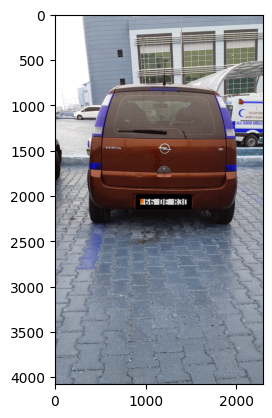

In [16]:
import matplotlib.pyplot as plt
img2 = img_predict.copy()
for box in result[0].boxes:
    x1, y1, x2, y2 = map(int,box.xyxy[0])
    cv2.rectangle(img2,(x1,y1),(x2,y2),color = (0,0,0),thickness=50)

plt.imshow(img2)
plt.show()

In [40]:
pip install pytesseract

Note: you may need to restart the kernel to use updated packages.


In [45]:
from PIL import Image
import pytesseract 


In [ ]:
import cv2
from PIL import Image
import pytesseract
from ultralytics import YOLO

# Tesseract OCR yolunu belirtin (Windows için örnek)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# YOLO modelini yükle
model = YOLO("runs/detect/train/weights/best.pt")

# Görüntüyü yükle ve plakayı tespit et
img_predict = cv2.imread("dataset/images/143.jpg")
result = model.predict(source=img_predict, conf=0.5)

# Tespit edilen plakaları işle
for detection in result:
    boxes = detection.boxes
    for box in boxes:
        # Plaka koordinatlarını al
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        
        # Plaka bölgesini kırp
        plate_img = img_predict[y1:y2, x1:x2]
        
        # Görüntüyü gri tonlamalı hale getir
        gray_plate = cv2.cvtColor(plate_img, cv2.COLOR_BGR2GRAY)
        
        # Gürültüyü azaltmak için threshold uygula
        _, thresh_plate = cv2.threshold(gray_plate, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
        # OCR ile metni oku
        plate_text = pytesseract.image_to_string(thresh_plate, config='--psm 6')
        print("Tespit edilen plaka metni:", plate_text.strip())
        
        # Orijinal görüntüye plaka metnini yazdır
        cv2.putText(img_predict, plate_text.strip(), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        cv2.rectangle(img_predict, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Sonucu göster
cv2.imshow("Plaka Tespiti ve OCR", img_predict)
cv2.waitKey(0)
